# Linear regression using Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Load data

In [2]:
data = pd.read_csv("insurance.csv")
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Transform smoker and sex columns into numeric values
data["smoker"] = data["smoker"].apply(lambda x: 1 if x == "yes" else 0)
data["sex"] = data["sex"].apply(lambda x: 1 if x == "female" else 0)

# Remove region column
data.drop(
    columns=["region"],
    inplace=True,
)


In [4]:
# Show data correlation according to pearson's correlation coeficient
data.corr()


,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


## Split into train and test

In [5]:
data = data.to_numpy()

# Standardize dataset
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Add constant column for x0 weight
X0 = np.ones(len(data))
data = np.column_stack((X0, data))

x_train, x_test, y_train, y_test = train_test_split(
    data[:, :-1], data[:, -1], test_size=0.33, random_state=42
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((896, 6), (442, 6), (896,), (442,))

## Define cost function

In [ ]:
def mean_squeared_error(y_true, y_pred):
    return sum(((y_true - y_pred) ** 2)) / (2 * len(y_true))


## Batch Gradient Descent
### Calculate weights

![alt text](BatchGradientDescent.png "Gradient descent")

In [30]:
class BatchGradientDescent:
    def __init__(self, learning_rate: float, epochs: int):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost = []
        self.weights = None

    def predict(self, x):
        return [np.dot(self.weights, item) for item in x]

    def fit(self, x, y):
        self.weights = np.random.uniform(low=-1, size=len(x[0]))
        for _ in range(self.epochs):
            self.cost.append(mean_squeared_error(y, self.predict(x)))

            temp_weight = np.zeros(len(x[0]))

            for j in range(len(x[0])):  # Loop attributes
                for i in range(len(x)):  # Loop examples
                    temp_weight[j] += (np.dot(self.weights, x[i]) - y[i]) * x[i, j]

            self.weights -= self.learning_rate * (temp_weight / len(x))


bgd = BatchGradientDescent(learning_rate=0.01, epochs=200)
bgd.fit(x_train, y_train)
r2_score(y_test, bgd.predict(x_test))


0.6897217575745798

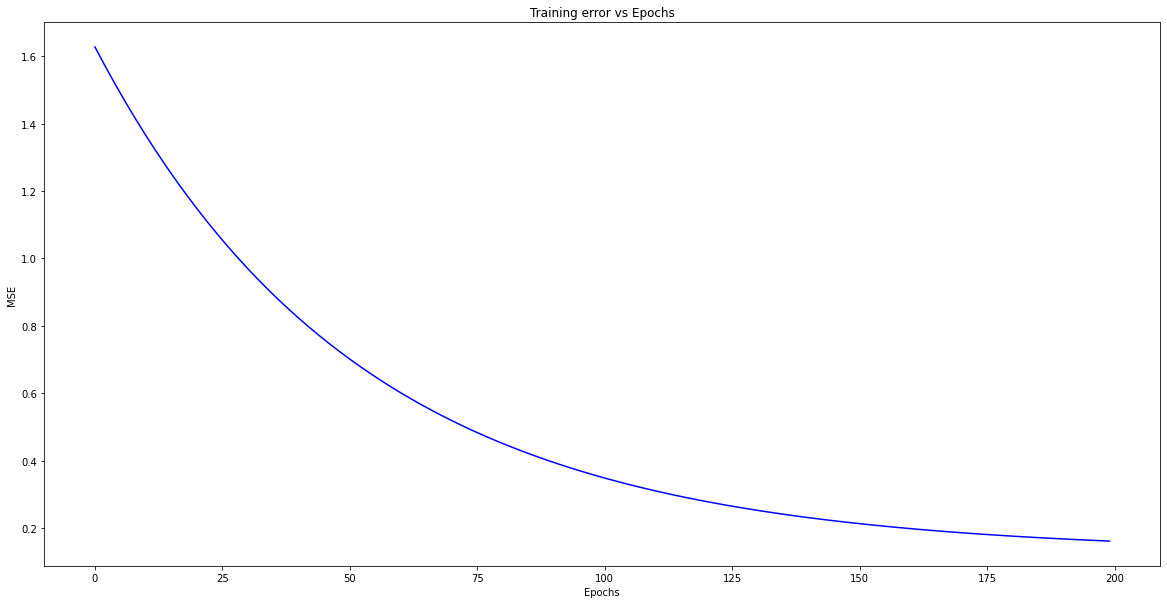

In [114]:
plt.figure(figsize=(20, 10))
plt.title("Training error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(bgd.cost, color="blue")
plt.show()


## Stochastic Gradient Descent

![alt text](StochasticGradientDescent.png "Gradient descent")

In [32]:
class StochasticGradientDescent:
    def __init__(self, learning_rate: float, epochs: int):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost = []
        self.weights = None

    def predict(self, x):
        return [np.dot(self.weights, item) for item in x]

    def fit(self, x, y):
        self.weights = np.random.uniform(low=-1, size=len(x[0]))
        for _ in range(self.epochs):
            self.cost.append(mean_squeared_error(y, self.predict(x)))

            temp_weight = np.zeros(len(x[0]))

            for i in range(len(x)):  # Loop examples
                for j in range(len(x[0])):  # Loop attributes
                    temp_weight[j] = (np.dot(self.weights, x[i]) - y[i]) * x[i, j]

                self.weights -= self.learning_rate * temp_weight


sgd = StochasticGradientDescent(learning_rate=0.001, epochs=10)
sgd.fit(x_train, y_train)
r2_score(y_test, sgd.predict(x_test))


0.7590976347588346

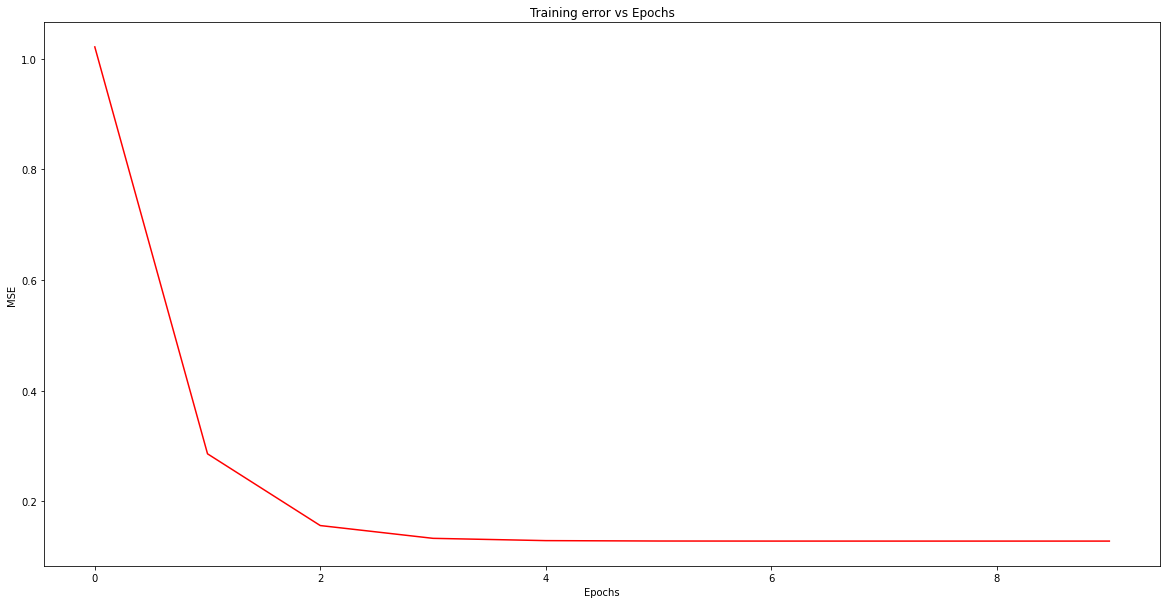

In [116]:
plt.figure(figsize=(20, 10))
plt.title("Training error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(sgd.cost, color="red")
plt.show()


## Mini-batch Gradient Descent

![alt text](MiniBatchGradientDescent.png "Gradient descent")

In [112]:
class MiniBatchGradientDescent:
    def __init__(self, learning_rate: float, epochs: int, batch: int):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost = []
        self.batch = batch
        self.weights = None

    def predict(self, x):
        return [np.dot(self.weights, item) for item in x]

    def fit(self, x, y):
        self.weights = np.random.uniform(low=-1, size=len(x[0]))
        for _ in range(self.epochs):
            self.cost.append(mean_squeared_error(y, self.predict(x)))

            temp_weight = np.zeros(len(x[0]))

            for i in range(0, len(x), self.batch):  # Loop examples
                for j in range(len(x[0])):  # Loop attributes
                    for k in range(i, i + self.batch):
                        temp_weight[j] += (np.dot(self.weights, x[k]) - y[k]) * x[k, j]

                self.weights -= self.learning_rate * (temp_weight / self.batch)


mbgd = MiniBatchGradientDescent(learning_rate=0.001, epochs=10, batch=16)
mbgd.fit(x_train, y_train)
r2_score(y_test, mbgd.predict(x_test))


0.7575240771236382

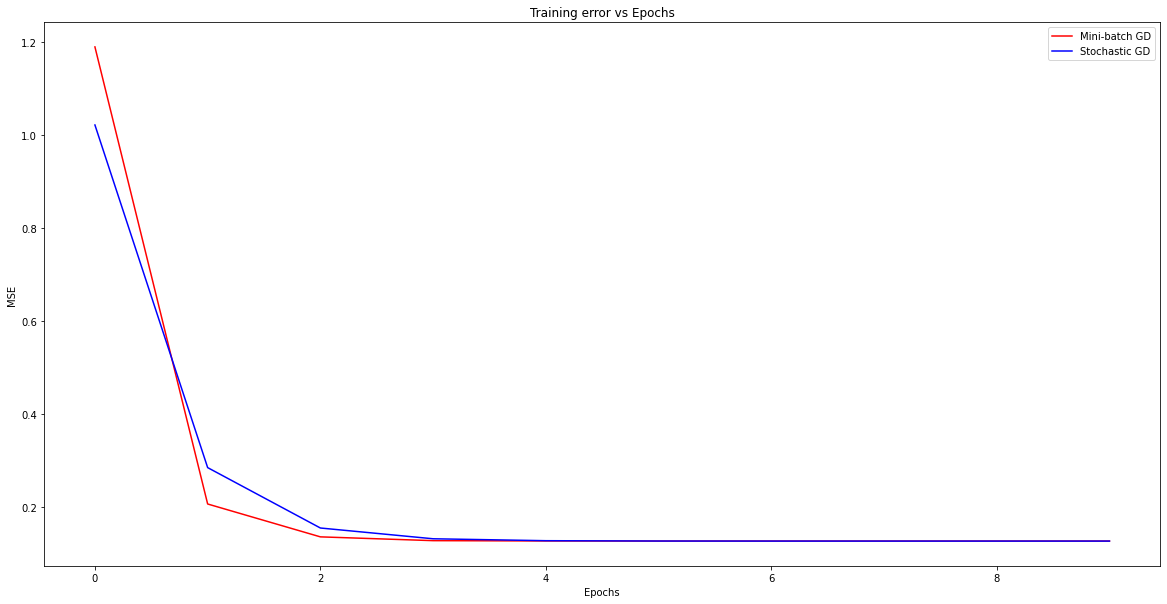

In [119]:
plt.figure(figsize=(20, 10))
plt.title("Training error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(mbgd.cost, color="red", label="Mini-batch GD")
plt.plot(sgd.cost, color="blue", label="Stochastic GD")
plt.legend()
plt.show()
